```
Name : Aryan Chauhan
PRN  : 1032222639
Div  : TY Sec-B ECE AI-ML
```

# **Machine Learning Experiment 5 - Home Loan Approval**
In this experiment, I have used various ML models to classify if a person is eligible for loan approval.


## 1. Importing dependencies
1. ```numpy``` - Mathematical computations.
2. ```pandas*``` - Very important, I used it entirely for playing with the data throught the project.
3. ```matplotlib``` - I used matplotlib to visualize the counter plots.
4. ```sklearn``` - I used sklearn for importing the model. I also used it for determining the basic accuracy score, etc.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Importing data

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 3. 1v1 with the data

### 3.1 Understanding the dataset

1. ```Loan_ID``` - The ID of the claimant.
2. ```Gender``` - The gender of the claimant.
3. ```Married``` - If the claimant is married/not married (Yes/No)
4. ```Depednants``` - No. of family members.
5. ```Education``` - Graduate/Not graduate.
6. ```Self-Employed``` - Yes/No.
7. ```Applicant Income``` - Monthly Salary.
8. ```Coapplicant Income``` - Additional Salary.
9. ```Loan amount``` - Claimant's loan amount.
10. ```Loan amount term``` - In terms of days.
11. ```Credit_history``` - Record of previous credit history (0 - being bad and 1 being good).
12. ```Property_area``` - The location of the property (Rural/SemiUrban/Urban).
13. ```Loan_status``` - Approved (1), Not approved (0).

### 3.2 Preprocessing required
1. ```LabelEncoder``` - **Married, Education, loan_status**.
  Here, the values in the features are binary classified, just that they are in a format that the model cannot read. The model needs to formulate these values into ```boolean/binary``` format. Hence I use Label_Encoder to convert these values into binary format.
2. ```OneHotEncoder using dummies``` - **Property_Area**. Here property area is not into a boolean value format, hence it cannot be classified into a binary format. This is why I used OneHotEncoder. OneHotEncoder uses `4-bit Encoding`  to classify data into multiclass 4-bit format. This helps the machine learning algorithm for better prediction.

## 3.2 Data dimensionality and Information
I had to understand the dimensions and other information like the non-null count of the data prior to start working on it.

### 3.2.1 Dimensions

In [ ]:
train_data.shape

(614, 13)

### 3.2.2 Information

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### 3.2.3 Statistical Analysis

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### 3.2.4 Null value verification

In [ ]:
train_data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Now here, the following data is missing
```bash
gender - 13,
married - 3,
dependents - 15,
self_employed - 32,
loan_amount - 22,
loan_amount_term - 14,
credit_history - 50
```

I can solve this missing data problem using three

### 3.2.5 Brief Information

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 3.2.6 Using Label Encoder

In [ ]:
label_encoder = LabelEncoder()
train_data['Married'] = label_encoder.fit_transform(train_data['Married'])

In [ ]:
train_data['Education'] = label_encoder.fit_transform(train_data['Education'])

In [ ]:
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

In [ ]:
train_data['Self_Employed'] = label_encoder.fit_transform(train_data['Self_Employed'])

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


### 3.2.7 Using OneHotEncoder

In [ ]:
dummies = pd.get_dummies(train_data['Property_Area'], prefix='Property_Area')
train_data_encoded = pd.concat([train_data, dummies], axis=1)
trained_data_encoded = train_data_encoded.drop('Property_Area', axis=1)

### 3.2.8 Using LabelEncoder again because I found out errors

In [ ]:
trained_data_encoded['Property_Area_Rural'] = label_encoder.fit_transform(trained_data_encoded['Property_Area_Rural'])

In [ ]:
trained_data_encoded['Property_Area_Semiurban'] = label_encoder.fit_transform(trained_data_encoded['Property_Area_Semiurban'])

In [ ]:
trained_data_encoded['Property_Area_Urban'] = label_encoder.fit_transform(trained_data_encoded['Property_Area_Urban'])

In [ ]:
trained_data_encoded['Gender'] = label_encoder.fit_transform(trained_data_encoded['Gender'])

In [ ]:
trained_data_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,0,1


In [ ]:
trained_data_encoded['LoanAmount'] = trained_data_encoded['LoanAmount'].fillna(trained_data_encoded['LoanAmount'].mean())

### 3.2.8 Converting ```string``` values to ```int``` values

In [ ]:
trained_data_encoded['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
trained_data_encoded['Dependents'] = pd.to_numeric(trained_data_encoded['Dependents'],errors='coerce')
trained_data_encoded['Dependents'] = trained_data_encoded['Dependents'].fillna(3).astype(int)
trained_data_encoded['Dependents'].unique()

array([0, 1, 2, 3])

In [ ]:
trained_data_encoded.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1


In [ ]:
trained_data_encoded.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14


### 3.2.9 Final changes
Changes that will make the data ready so as to be an input to the model

In [ ]:
trained_data_encoded['Loan_Amount_Term'] = trained_data_encoded['Loan_Amount_Term'].fillna(trained_data_encoded['Loan_Amount_Term'].mean())

In [ ]:
trained_data_encoded['Credit_History'] = trained_data_encoded['Credit_History'].fillna(trained_data_encoded['Credit_History'].mean())

In [ ]:
trained_data_encoded.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
trained_data_encoded.duplicated().sum()

0

In [ ]:
trained_data_encoded['Loan_ID'] = trained_data_encoded['Loan_ID'].str.replace('LP', '', regex=False).astype(int)
trained_data_encoded['Loan_ID'].head()

,Loan_ID
0,1002
1,1003
2,1005
3,1006
4,1008


### 3.3.0 Plots to check data filtering

<ipython-input-317-e77e0cafeb77>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=trained_data_encoded, palette="viridis", ax=axs[0, 0])
<ipython-input-317-e77e0cafeb77>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=trained_data_encoded, palette="viridis", ax=axs[0, 1])
<ipython-input-317-e77e0cafeb77>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=trained_data_encoded, palette="viridis", ax=axs[1, 0])
<ipython-input-317-e77e0cafeb77>:17: FutureWarning: 

Passing `palet

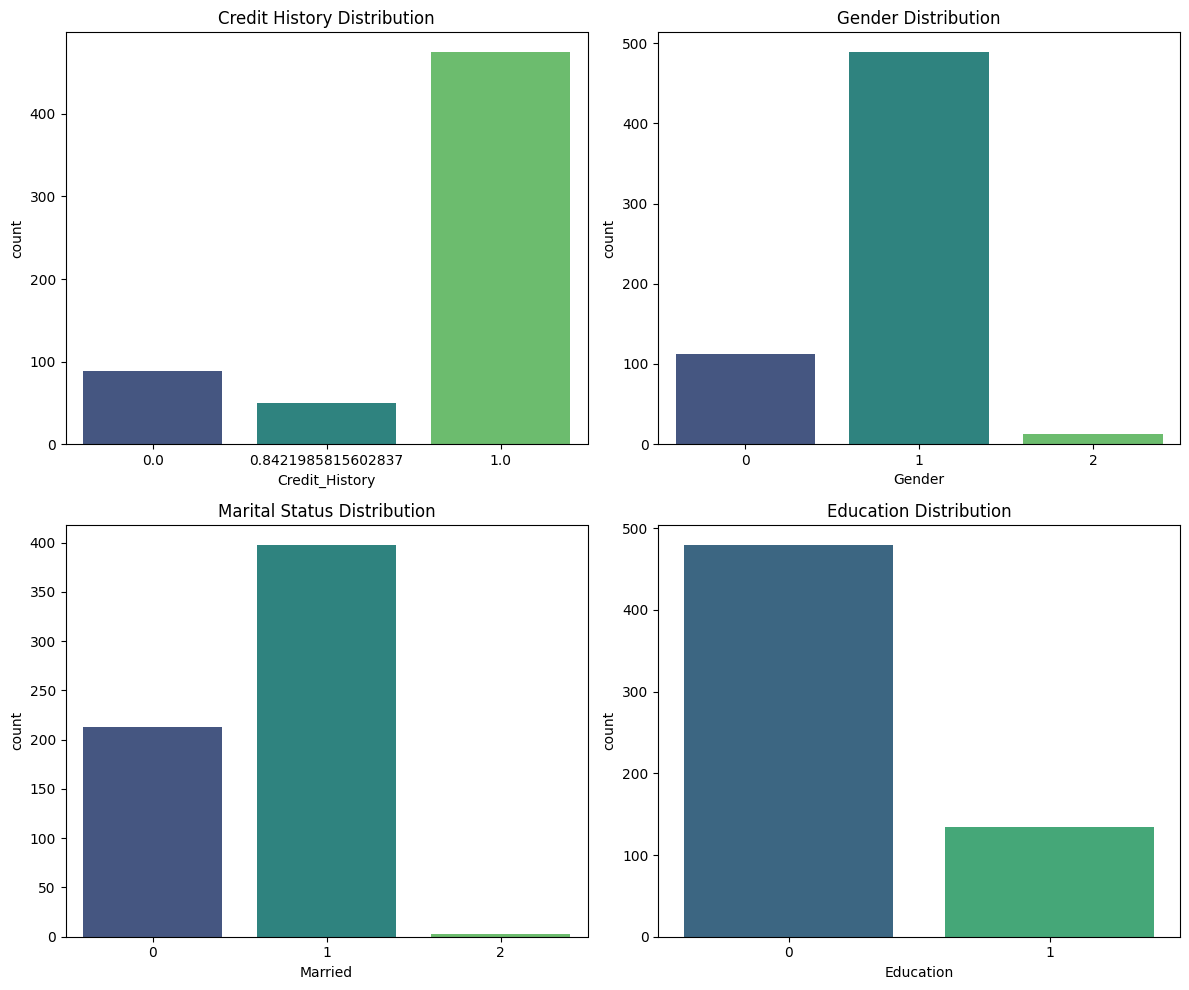

In [ ]:
num_rows = 2
num_cols = 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Plot each subplot
sns.countplot(x="Credit_History", data=trained_data_encoded, palette="viridis", ax=axs[0, 0])
axs[0, 0].set_title('Credit History Distribution')

sns.countplot(x="Gender", data=trained_data_encoded, palette="viridis", ax=axs[0, 1])
axs[0, 1].set_title('Gender Distribution')

sns.countplot(x="Married", data=trained_data_encoded, palette="viridis", ax=axs[1, 0])
axs[1, 0].set_title('Marital Status Distribution')

sns.countplot(x="Education", data=trained_data_encoded, palette="viridis", ax=axs[1, 1])
axs[1, 1].set_title('Education Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
trained_data_encoded['Credit_History'] = trained_data_encoded['Credit_History'].replace(0.8421985815602837, 0)

In [ ]:
trained_data_encoded['Married'] = trained_data_encoded['Married'].replace(2, 0)

In [ ]:
trained_data_encoded['Gender'] = trained_data_encoded['Gender'].replace(2, 0)

### 3.3.1 Handling errors and plotting again

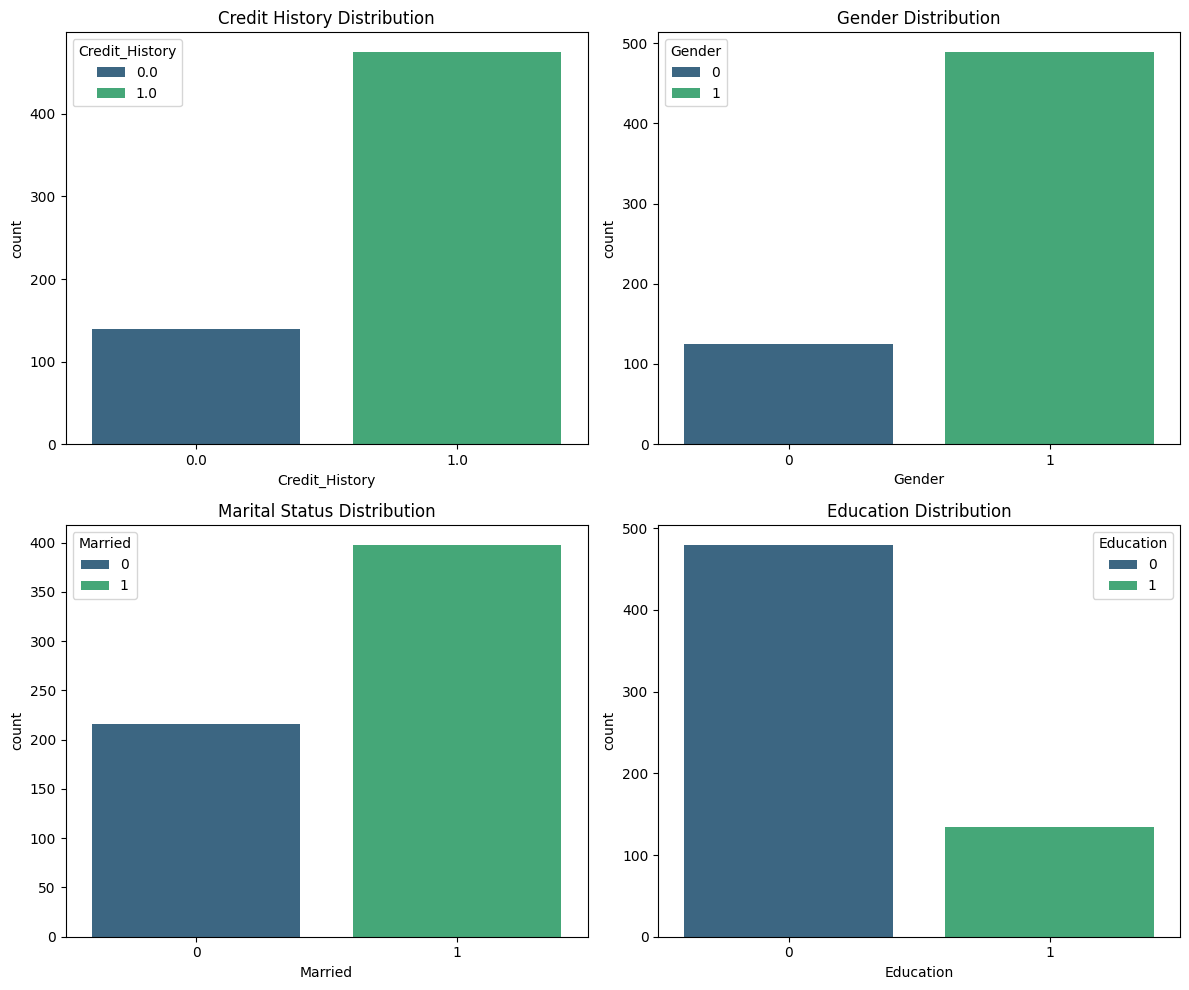

In [ ]:
# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2

# Create a figure and axes for the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10))

# Plot each subplot
sns.countplot(x="Credit_History", data=trained_data_encoded, ax=axs[0, 0], hue="Credit_History", palette="viridis")
axs[0, 0].set_title('Credit History Distribution')

sns.countplot(x="Gender", data=trained_data_encoded, ax=axs[0, 1], hue="Gender", palette="viridis")
axs[0, 1].set_title('Gender Distribution')

sns.countplot(x="Married", data=trained_data_encoded, ax=axs[1, 0], hue="Married", palette="viridis")
axs[1, 0].set_title('Marital Status Distribution')

sns.countplot(x="Education", data=trained_data_encoded, ax=axs[1, 1], hue="Education", palette="viridis")
axs[1, 1].set_title('Education Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### 3.3.2 Using correlation graph to understand variance of features on each other

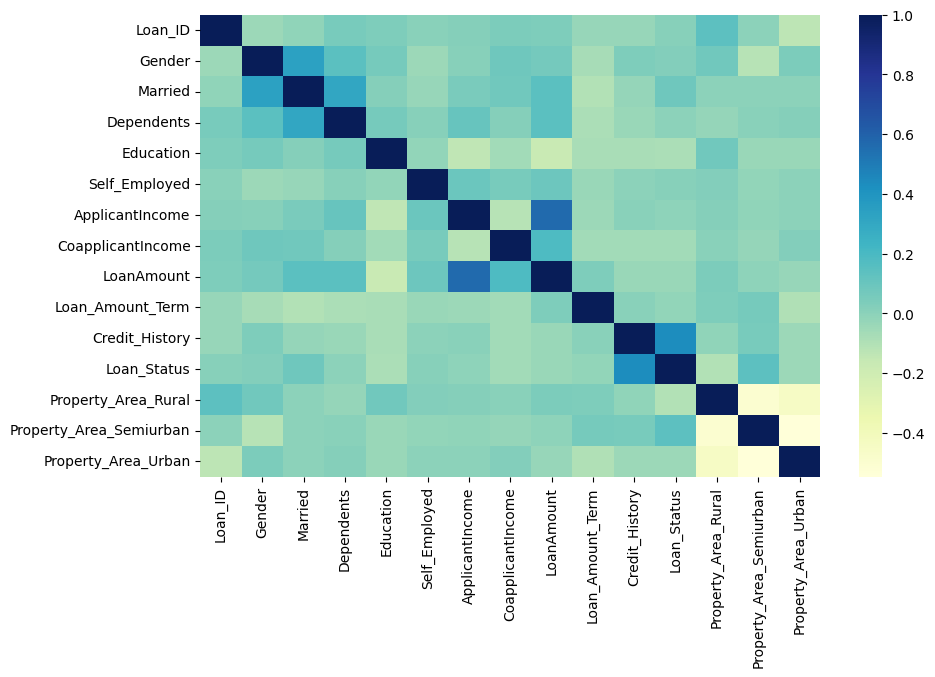

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(trained_data_encoded.corr(), cmap="YlGnBu")
plt.show()

## 4. Validating filtered and manipulated dataset

In [ ]:
trained_data_encoded.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
trained_data_encoded.duplicated().sum()

0

In [ ]:
trained_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    int64  
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Dependents               614 non-null    int64  
 4   Education                614 non-null    int64  
 5   Self_Employed            614 non-null    int64  
 6   ApplicantIncome          614 non-null    int64  
 7   CoapplicantIncome        614 non-null    float64
 8   LoanAmount               614 non-null    float64
 9   Loan_Amount_Term         614 non-null    float64
 10  Credit_History           614 non-null    float64
 11  Loan_Status              614 non-null    int64  
 12  Property_Area_Rural      614 non-null    int64  
 13  Property_Area_Semiurban  614 non-null    int64  
 14  Property_Area_Urban      6

In [ ]:
trained_data_encoded.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1999.785016,0.796417,0.648208,0.817590,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.773616,0.687296,0.291531,0.379479,0.328990
std,567.097644,0.402991,0.477919,1.060618,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.418832,0.463973,0.454838,0.485653,0.470229
min,1002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1532.750000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1993.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2476.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2990.000000,1.000000,1.000000,3.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 5. Using Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_indices, test_indices in split.split(trained_data_encoded, trained_data_encoded['Loan_Status']):
  strat_train_set = trained_data_encoded.loc[train_indices]
  strat_test_set = trained_data_encoded.loc[test_indices]

In [ ]:
strat_train_set

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
154,1535,1,0,0,0,0,3254,0.0,50.0,360.0,1.0,1,0,0,1
239,1792,1,1,1,0,0,3315,0.0,96.0,360.0,1.0,1,0,1,0
448,2443,1,1,2,0,0,3340,1710.0,150.0,360.0,0.0,0,1,0,0
471,2517,1,1,1,1,0,2653,1500.0,113.0,180.0,0.0,0,1,0,0
273,1894,1,1,0,0,0,2620,2223.0,150.0,360.0,1.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,1744,1,0,0,0,0,2971,2791.0,144.0,360.0,1.0,1,0,1,0
349,2138,1,1,0,0,0,2625,6250.0,187.0,360.0,1.0,1,1,0,0
26,1068,1,1,0,0,0,2799,2253.0,122.0,360.0,1.0,1,0,1,0
96,1327,0,1,0,0,0,2484,2302.0,137.0,360.0,1.0,1,0,1,0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 154 to 354
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  491 non-null    int64  
 1   Gender                   491 non-null    int64  
 2   Married                  491 non-null    int64  
 3   Dependents               491 non-null    int64  
 4   Education                491 non-null    int64  
 5   Self_Employed            491 non-null    int64  
 6   ApplicantIncome          491 non-null    int64  
 7   CoapplicantIncome        491 non-null    float64
 8   LoanAmount               491 non-null    float64
 9   Loan_Amount_Term         491 non-null    float64
 10  Credit_History           491 non-null    float64
 11  Loan_Status              491 non-null    int64  
 12  Property_Area_Rural      491 non-null    int64  
 13  Property_Area_Semiurban  491 non-null    int64  
 14  Property_Area_Urban      491 

## 6. Standardizing the dataset into X and y

In [ ]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Loan_Status'], axis=1)
y = strat_train_set['Loan_Status']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

## 7. Creating test and train data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.20, random_state=24)

nb_classifier = GaussianNB()
loan_prediction_model = nb_classifier.fit(X_train, y_train)

## 8. Prediction and accuracy

In [ ]:
y_pred = loan_prediction_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8080808080808081


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ", "\n",conf_matrix)

Confusion Matrix :  
 [[15 13]
 [ 6 65]]


## 9. Final Report of NB Classifier with ```80.80%``` accuracy

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report : ", "\n\n", class_report)

Classification Report :  

               precision    recall  f1-score   support

           0       0.71      0.54      0.61        28
           1       0.83      0.92      0.87        71

    accuracy                           0.81        99
   macro avg       0.77      0.73      0.74        99
weighted avg       0.80      0.81      0.80        99



## 10. Saving the model using pickle

In [ ]:
import pickle

# Save the trained model to a file
model_filename = 'loan_approval_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(loan_prediction_model, file)

print(f"Model saved as {model_filename}")


Model saved as loan_approval_model.pkl


## 11. Output on ```test dataset``` using ```loan_approval_model.pkl```

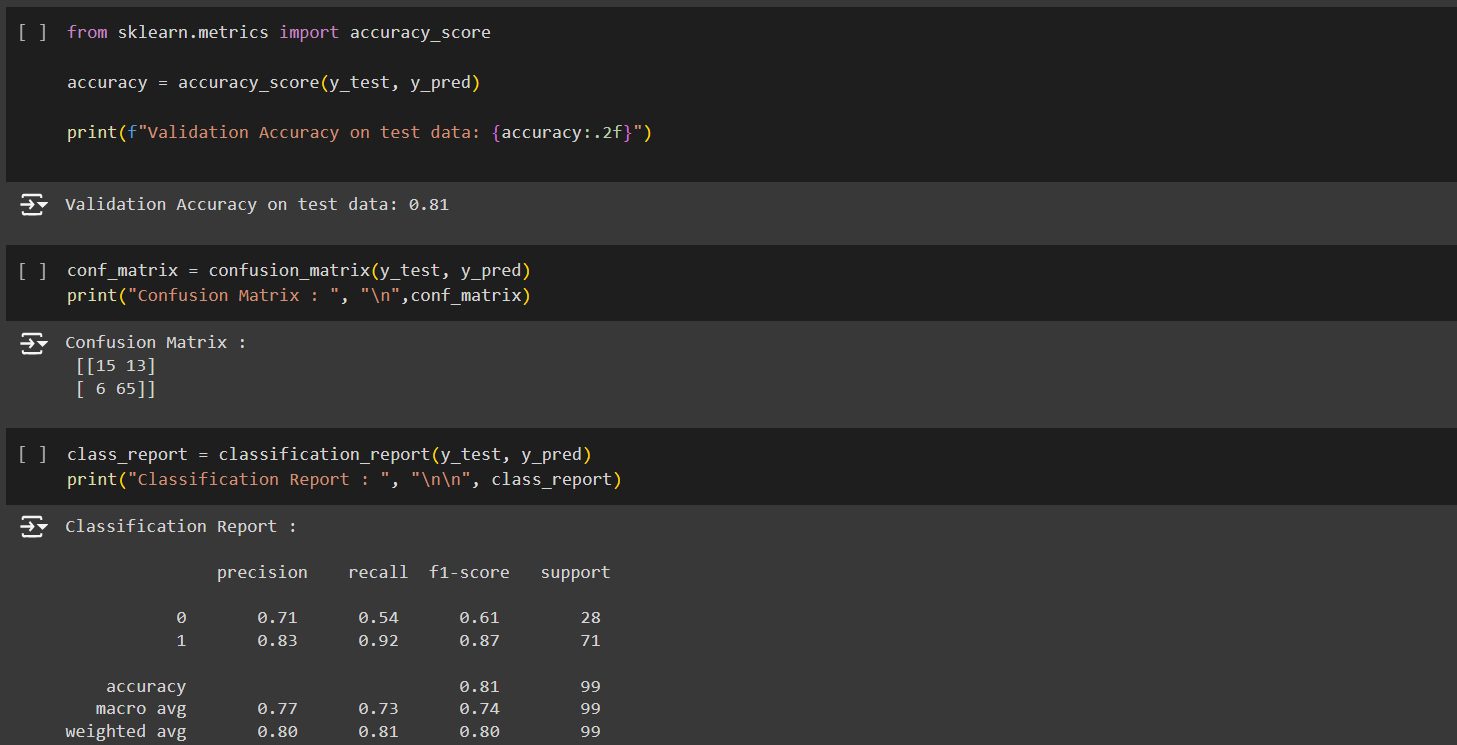

---

```bash
End of Experiment
```